In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=32)

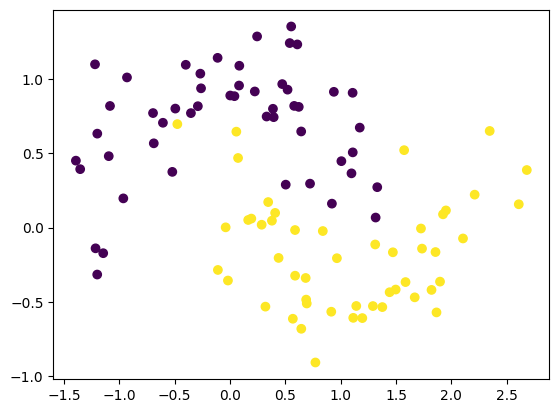

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

hist1 = model1.fit(X, y, epochs=1500, validation_split = 0.2,verbose=1)

Epoch 1/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.6727 - loss: 0.6510 - val_accuracy: 0.7500 - val_loss: 0.5053
Epoch 2/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8992 - loss: 0.3155 - val_accuracy: 0.8500 - val_loss: 0.4747
Epoch 3/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9016 - loss: 0.2335 - val_accuracy: 0.8000 - val_loss: 0.6222
Epoch 4/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9117 - loss: 0.2487 - val_accuracy: 0.8000 - val_loss: 0.7443
Epoch 5/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9352 - loss: 0.1791 - val_accuracy: 0.8000 - val_loss: 0.6319
Epoch 6/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9133 - loss: 0.1718 - val_accuracy: 0.8000 - val_loss: 0.6935
Epoch 7/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9352 - loss: 0.1445 - val_accuracy: 0.8000 - val_loss: 0.7179
Epoch 8/1500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9391 - loss: 0.1167 - val_accuracy: 0.8000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


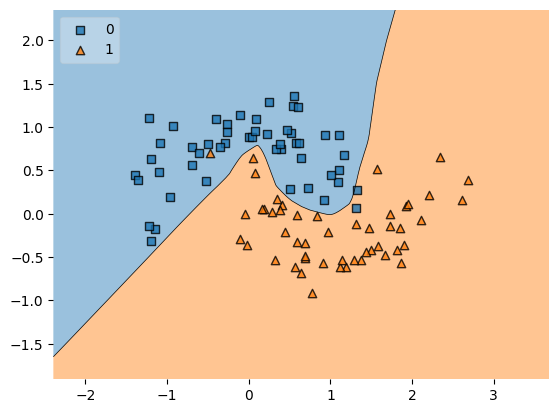

In [6]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.show()

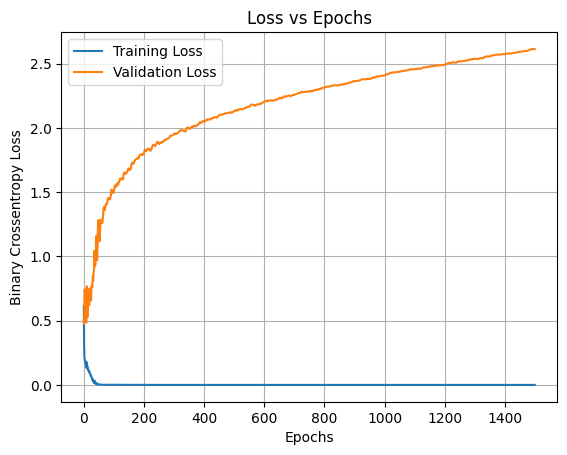

In [8]:
plt.plot(hist1.history['loss'], label='Training Loss')
plt.plot(hist1.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.02)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.02)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

hist2 = model2.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.8750 - loss: 0.3583 - val_accuracy: 0.8500 - val_loss: 0.5493
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9469 - loss: 0.2649 - val_accuracy: 0.8000 - val_loss: 0.6332
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9312 - loss: 0.2250 - val_accuracy: 0.8000 - val_loss: 0.8299
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9172 - loss: 0.2558 - val_accuracy: 0.8000 - val_loss: 0.7093
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9055 - loss: 0.2296 - val_accuracy: 0.8500 - val_loss: 0.5290
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9273 - loss: 0.2477 - val_accuracy: 0.8500 - val_loss: 0.5025
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9438 - loss: 0.2551 - val_accuracy: 0.8000 - val_loss: 0.5720
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9211 - loss: 0.2247 - val_accuracy: 0.7500 - val_los

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


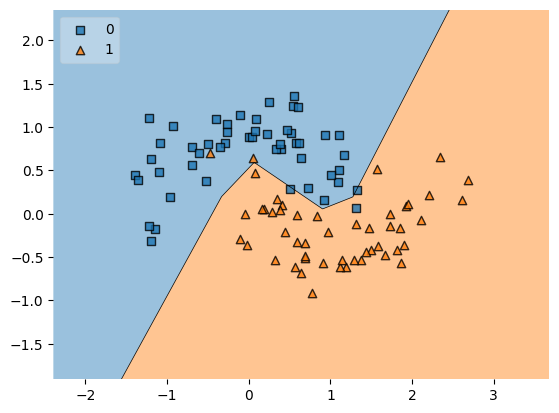

In [13]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.show()

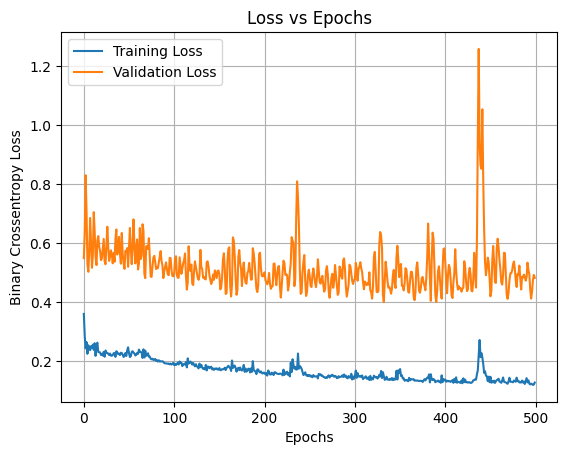

In [14]:
plt.plot(hist2.history['loss'], label='Training Loss')
plt.plot(hist2.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

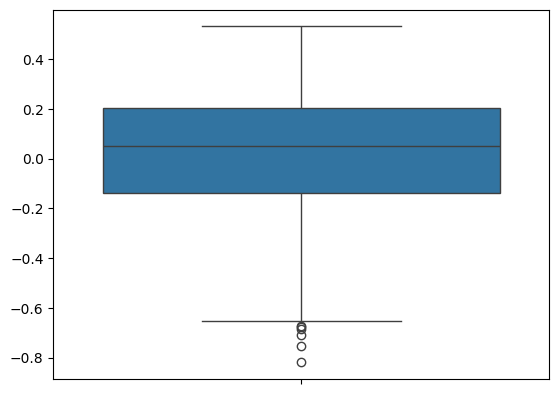

In [16]:
sns.boxplot(model1_weight_layer1)

<Axes: >

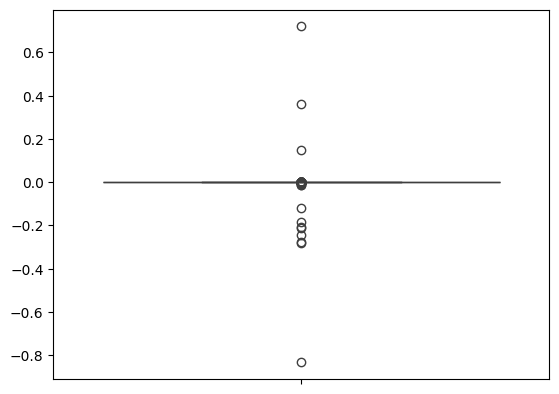

In [17]:
sns.boxplot(model2_weight_layer1)

In [18]:
model1_weight_layer1.min()

np.float32(-0.81931704)

In [19]:
model2_weight_layer1.min()

np.float32(-0.83253)

/tmp/ipython-input-26-4170386930.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1, label='Model 1 Weights', hist=True, kde=True, color='blue')
/tmp/ipython-input-26-4170386930.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1, label='Model 2 Weights

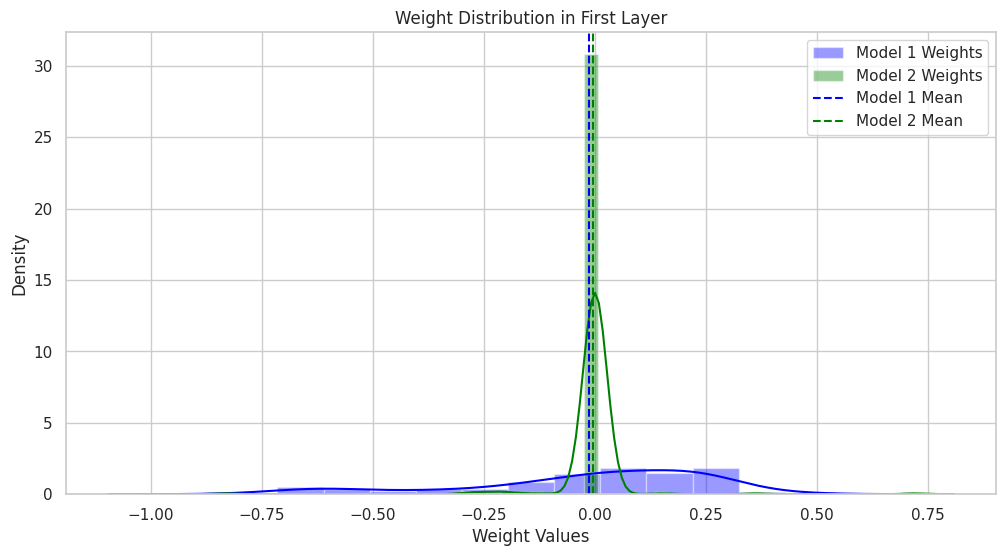

In [26]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.distplot(model1_weight_layer1, label='Model 1 Weights', hist=True, kde=True, color='blue')
sns.distplot(model2_weight_layer1, label='Model 2 Weights', hist=True, kde=True, color='green')

plt.axvline(np.mean(model1_weight_layer1), color='blue', linestyle='--', label='Model 1 Mean')
plt.axvline(np.mean(model2_weight_layer1), color='green', linestyle='--', label='Model 2 Mean')

plt.title('Weight Distribution in First Layer')
plt.xlabel('Weight Values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
model1.get_weights()[0].reshape(256)

array([-5.69667518e-01,  1.04841687e-01, -5.92800319e-01,  3.07421774e-01,
       -5.76863531e-03,  2.38305569e-01, -1.30850486e-02,  8.68215188e-02,
        2.92073041e-01,  6.51266705e-03, -6.53626919e-01,  2.77122945e-01,
       -5.64321101e-01,  5.81453964e-02,  4.14809473e-02,  2.41322875e-01,
       -6.48540556e-01, -7.75058866e-02, -5.78739405e-01,  6.68741614e-02,
        2.53765553e-01,  1.83663413e-01,  1.34014279e-01, -4.21046861e-04,
       -1.22704329e-02, -1.60577208e-01, -2.52422076e-02, -1.68071404e-01,
        1.57392070e-01,  6.86356127e-02, -3.21323693e-01,  2.50849634e-01,
        8.27112794e-02,  2.80415893e-01,  5.21479622e-02,  1.46891907e-01,
       -6.32227540e-01,  1.58866942e-01,  2.50768811e-01, -5.50062776e-01,
        5.24558406e-03, -3.50055695e-01, -5.19392252e-01,  4.01863158e-01,
        9.03966650e-02, -4.88437921e-01,  8.65037590e-02,  2.10518569e-01,
       -8.82077441e-02, -1.57440826e-01, -1.50874462e-02,  7.56109133e-03,
        2.87195370e-02, -